# Clustering- Assignment 07_Airlines

## Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

In [1]:
#Import required libraries
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data from a excel file
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
data.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [4]:
data.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
ID#                  3999 non-null int64
Balance              3999 non-null int64
Qual_miles           3999 non-null int64
cc1_miles            3999 non-null int64
cc2_miles            3999 non-null int64
cc3_miles            3999 non-null int64
Bonus_miles          3999 non-null int64
Bonus_trans          3999 non-null int64
Flight_miles_12mo    3999 non-null int64
Flight_trans_12      3999 non-null int64
Days_since_enroll    3999 non-null int64
Award?               3999 non-null int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data1 = data.drop('ID#', axis=1)
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
data2 = data1.copy()
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
norm_data=pd.DataFrame(normalize(data2),columns=data2.columns)
norm_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


## 1. Using K-Means clustering

In [8]:
#Finding the within cluster sum of squares- WCSS
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=48)
    kmeans.fit(norm_data)
    WCSS.append(kmeans.inertia_)
WCSS

[484.8511291307252,
 267.59741095991853,
 173.27025625511413,
 116.32481600680406,
 90.82479659201528,
 70.47278519820833,
 60.0742229366665,
 51.93027200799071,
 47.21638993155997,
 42.886169279071794]

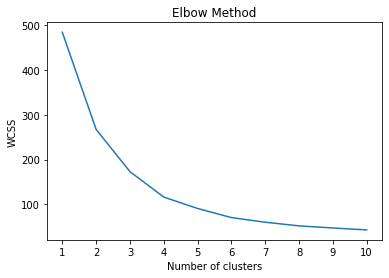

In [9]:
#Deciding the hyper-parameter K
#use elbow-plot

plt.plot(range(1,11),WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of clusters', )
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.show()

# Consider K = 4 as per the following plot

### Build K-Means cluster algorithm

In [10]:
clusters = KMeans(4,random_state= 48)
clusters.fit(norm_data)
clusters.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [11]:
# Assign the clusters to the data set
data2['clust'] = clusters.labels_
data2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [12]:
data2.groupby('clust').agg(['mean']).reset_index()


,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,72378.903670,119.606422,3.077982,1.024771,1.018349,31486.477982,17.476147,445.017431,1.317431,4044.253211,0.477064
1,1,88484.857577,175.062961,1.495441,1.008250,1.001737,8110.131568,8.770734,476.973079,1.439427,4060.013895,0.255319
2,2,5129.247934,8.285124,1.004132,1.004132,1.000000,891.388430,3.012397,66.466942,0.194215,4843.239669,0.185950
3,3,28617.579670,112.000000,3.280220,1.030220,1.068681,42166.565934,17.634615,659.725275,1.909341,4229.689560,0.901099


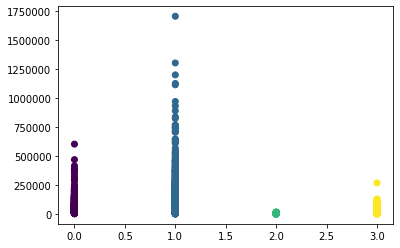

In [13]:

plt.scatter(data2['clust'],data2['Balance'], c=clusters.labels_)

In [14]:
clusters.inertia_

116.32481600680406

## 2. Using H-cluster algorithm

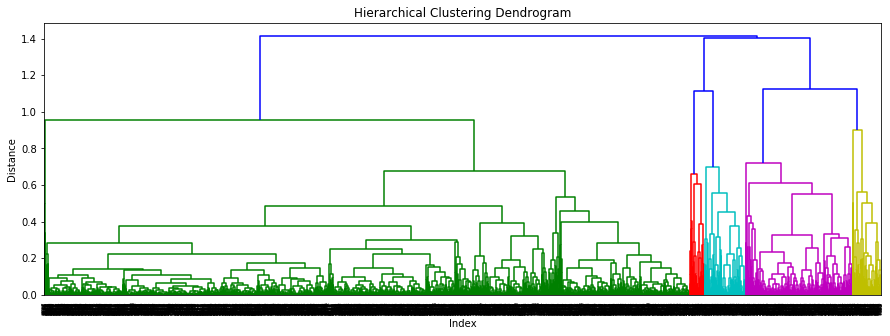

In [15]:
# ploting a dendrogram using the normalized data
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(norm_data, method='complete',metric='euclidean'))
# Considering k=5 as per the following plot

In [16]:
data3 = data1.copy()
data3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


### Building H-cluster algorithm

In [17]:
# creating cluster
h_clust = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
h_clust.fit(norm_data)
h_clust.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
#adding clusters to data set
data3['clust'] = h_clust.labels_
data3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [19]:
#Clustring the data
data3.groupby('clust').agg('mean').reset_index()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,85958.186325,163.835386,1.876215,1.012638,1.002916,13503.547959,11.000648,469.272197,1.402787,4043.470836,0.301685
1,1,49938.428291,109.797642,3.418468,1.031434,1.049116,40242.673870,18.194499,584.611002,1.722986,4072.086444,0.717092
2,2,15395.744526,93.620438,3.189781,1.021898,1.109489,44896.007299,17.065693,560.094891,1.708029,4517.262774,1.000000
3,3,7222.208122,10.177665,1.005076,1.000000,1.000000,1067.822335,3.395939,72.786802,0.213198,4885.304569,0.182741
4,4,1629.914286,0.000000,1.014286,1.000000,1.000000,652.228571,2.571429,42.142857,0.157143,4828.657143,0.171429


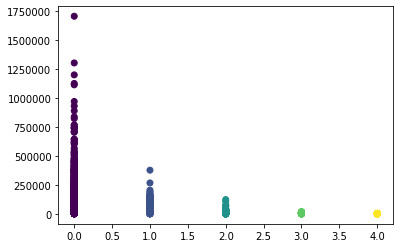

In [20]:
#Ploting the clusters
plt.scatter(data3['clust'],data3['Balance'], c=h_clust.labels_)

## 3. Using DBSCAN Clustering

In [21]:
# creating a copy of actual data
data4 = data1.copy()
data4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


### Building DBSCAN Algorithm

In [22]:
# Applying the DBSCAN algorithm
dbscan = DBSCAN(eps=.08, min_samples=4)
dbscan.fit(norm_data)


DBSCAN(algorithm='auto', eps=0.08, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [23]:
# Clusters
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
# adding clusters as a column to data set
data4['clust'] = dbscan.labels_

In [25]:
#creatng clusters with the data
data4.groupby('clust').agg('mean').reset_index()

,clust,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1,11956.548780,1071.414634,1.353659,1.024390,1.000000,9472.024390,12.524390,2444.280488,5.975610,4196.036585,0.585366
1,0,75253.705158,125.342058,2.079292,1.014113,1.012574,17376.447524,11.605337,420.434180,1.283295,4117.784193,0.365666
2,1,5617.636364,0.000000,1.181818,1.090909,1.000000,5008.636364,7.727273,36.363636,0.090909,4629.545455,0.454545
3,2,2016.750000,0.000000,1.000000,1.000000,1.000000,849.500000,4.000000,0.000000,0.000000,2753.500000,0.000000
4,3,3544.400000,0.000000,1.000000,1.000000,1.000000,2205.000000,8.400000,100.000000,0.200000,3420.000000,0.600000


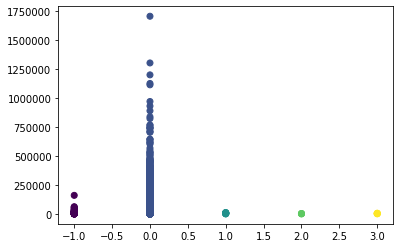

In [26]:
#Ploting the clusters
plt.scatter(data4['clust'],data4['Balance'],c= dbscan.labels_)